#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 06
**CH06A Comparing Online and Offline Prices: Testing the Difference**

billion-prices dataset dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")


In [32]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/online_offline_ALL_clean.csv", encoding="latin1")
# data = pd.read_csv("https://osf.io/yhbr5/download", encoding="latin1")


In [29]:
data["PRICETYPE"].unique()

array([nan, 'Regular Price', 'Sale/Discounted Price'], dtype=object)

In [31]:
data=data[data["PRICETYPE"] == "Sale/Discounted Price"]
data

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,DEVICEID,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s
8252,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3009,7.20,7.55,...,230b33833f875c89,20:53,04363000,20160228_205345.jpg,3009,NaN,Sale/Discounted Price,768619.0,NaN,Brazil
8253,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3011,7.50,7.99,...,230b33833f875c89,20:53,04363000,20160228_205318.jpg,3011,NaN,Sale/Discounted Price,768619.0,NaN,Brazil
8262,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3817,64.90,76.90,...,230b33833f875c89,20:55,04363000,20160228_205535.jpg,3817,NaN,Sale/Discounted Price,768619.0,NaN,Brazil
8263,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,38203,48.09,50.10,...,230b33833f875c89,20:13,04363000,20160228_201445.jpg,38203,NaN,Sale/Discounted Price,768619.0,NaN,Brazil
8271,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,49064,33.97,38.06,...,230b33833f875c89,21:08,04363000,20160228_210855.jpg,49064,NaN,Sale/Discounted Price,768619.0,NaN,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43178,USA,59,USA_59,2016-01-30,30.0,1.0,2016.0,070021026,16.79,17.99,...,7d0b53433985c0e0,08:57,02215,20160130_085732.jpg,070021026,NaN,Sale/Discounted Price,144211.0,NaN,USA
43179,USA,59,USA_59,2016-01-30,30.0,1.0,2016.0,070021028,10.39,10.99,...,7d0b53433985c0e0,08:51,02215,20160130_085108.jpg,070021028,NaN,Sale/Discounted Price,144211.0,NaN,USA
43213,USA,59,USA_59,2016-02-01,1.0,2.0,2016.0,049091796,2.99,2.99,...,7d0b53433985c0e0,16:19,02215,20160201_161924.jpg,049091796,NaN,Sale/Discounted Price,144211.0,NaN,USA
43463,USA,60,USA_60,2015-11-25,25.0,11.0,2015.0,36527802,14.99,34.00,...,f9a0be74f22e4dd3,15:42,02138,20151125_154340.jpg,NaN,NaN,Sale/Discounted Price,112190.0,NaN,USA


In [35]:
data["PRICETYPE"].unique()

array(['Regular Price', 'Sale/Discounted Price', nan], dtype=object)

In [36]:
# FILTER DATA
data = data.loc[
 (data["COUNTRY"] == "BRAZIL")
    & (data["PRICETYPE"] == "Regular Price")
    & (data["sale_online"].isnull())
    & (data["price"].notna())
    & (data["price_online"].notna())
]


In [37]:
data

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,DEVICEID,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s
8243,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,1056,11.95,11.95,...,230b33833f875c89,20:26,04363000,20160228_202650.jpg,1056,NaN,Regular Price,768619.0,NaN,Brazil
8244,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,13460,23.42,23.42,...,230b33833f875c89,20:43,04363000,20160228_204340.jpg,13460,NaN,Regular Price,768619.0,NaN,Brazil
8245,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,19892,13.90,13.90,...,230b33833f875c89,20:36,04363000,20160228_203625.jpg,19892,NaN,Regular Price,768619.0,NaN,Brazil
8246,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,23556,10.34,10.34,...,230b33833f875c89,21:14,04363000,20160228_211500.jpg,23556,NaN,Regular Price,768619.0,NaN,Brazil
8247,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,2765,57.89,57.89,...,230b33833f875c89,21:06,04363000,20160228_210658.jpg,2765,NaN,Regular Price,768619.0,NaN,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,982,24.99,24.95,...,230b33833f875c89,16:14,04363000,20160313_161457.jpg,982,NaN,Regular Price,768619.0,NaN,Brazil
8394,BRAZIL,11,BRAZIL_11,2015-11-05,5.0,11.0,2015.0,609585220867,29.90,26.90,...,8dd72cc5d45448f7,11:16,12243081,20151105_111612.jpg,NaN,NaN,Regular Price,124816.0,NaN,Brazil
8396,BRAZIL,11,BRAZIL_11,2015-11-05,5.0,11.0,2015.0,6923410713329,149.90,158.90,...,8dd72cc5d45448f7,11:12,12243081,20151105_111215.jpg,NaN,NaN,Regular Price,124816.0,NaN,Brazil
8399,BRAZIL,11,BRAZIL_11,2015-11-05,5.0,11.0,2015.0,7895500724739,179.90,93.90,...,8dd72cc5d45448f7,10:56,12243081,20151105_105700.jpg,NaN,NaN,Regular Price,124816.0,NaN,Brazil


In [4]:
# Drop obvious errors
data = data.loc[data["price"] < 1000]


In [38]:
# Compare variables
data["diff"] = data["price_online"] - data["price"]
descr = data["diff"].describe()


In [39]:
descr

count    122.000000
mean      -0.905328
std        8.667503
min      -86.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.110000
Name: diff, dtype: float64

In [40]:
data[data["diff"] > 0]

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8256,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,3215,12.90,12.96,...,20:22,04363000,20160228_202231.jpg,3215,NaN,Regular Price,768619.0,NaN,Brazil,0.06
8264,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,39234,15.09,15.99,...,20:44,04363000,20160228_204457.jpg,39234,NaN,Regular Price,768619.0,NaN,Brazil,0.90
8272,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,49094,65.03,75.14,...,21:09,04363000,20160228_210943.jpg,49094,NaN,Regular Price,768619.0,NaN,Brazil,10.11
8396,BRAZIL,11,BRAZIL_11,2015-11-05,5.0,11.0,2015.0,6923410713329,149.90,158.90,...,11:12,12243081,20151105_111215.jpg,NaN,NaN,Regular Price,124816.0,NaN,Brazil,9.00


In [57]:
data_min = data[data["diff"] == data["diff"].min()]
data_min

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8399,BRAZIL,11,BRAZIL_11,2015-11-05,5.0,11.0,2015.0,7895500724739,179.9,93.9,...,10:56,12243081,20151105_105700.jpg,NaN,NaN,Regular Price,124816.0,NaN,Brazil,-86.0


In [41]:
# Show products with duplicate 'id' values (not unique products)
duplicate_products = data[data.duplicated(subset='id', keep=False)]
duplicate_products

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8244,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,13460,23.42,23.42,...,20:43,04363000,20160228_204340.jpg,13460,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8245,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,19892,13.90,13.90,...,20:36,04363000,20160228_203625.jpg,19892,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8246,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,23556,10.34,10.34,...,21:14,04363000,20160228_211500.jpg,23556,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8249,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,2805,3.40,3.40,...,20:25,04363000,20160228_202546.jpg,2805,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8250,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,28356,18.05,18.05,...,20:24,04363000,20160228_202435.jpg,28356,NaN,Regular Price,768619.0,NaN,Brazil,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,75290,31.04,31.04,...,16:07,04363000,20160313_160740.jpg,75290,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8390,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,85539,38.19,38.19,...,15:34,04363000,20160313_153443.jpg,85539,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8391,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,9185,49.99,49.89,...,16:15,04363000,20160313_161533.jpg,9185,NaN,Regular Price,768619.0,NaN,Brazil,-0.10
8392,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,932,12.59,12.59,...,16:00,04363000,20160313_160027.jpg,932,NaN,Regular Price,768619.0,NaN,Brazil,0.00


In [63]:
# Statistic with n observations (products) in the data:
# products count
# using pandas nunique for clarity:
# data["id"].nunique()
#well i was intitally foing analysis among unique products id.unique but realized authors of the textbook skipped this part and did across all samples - 6439
#which does not make sense to me

l=len(data["id"].unique())
l2=len(data)

# statistic mean(diff)

pdiff_mean=data["diff"].sum()/l #I think should be right
s=round(data["diff"].sum()/l2,2) #lol

s

np.float64(-0.91)

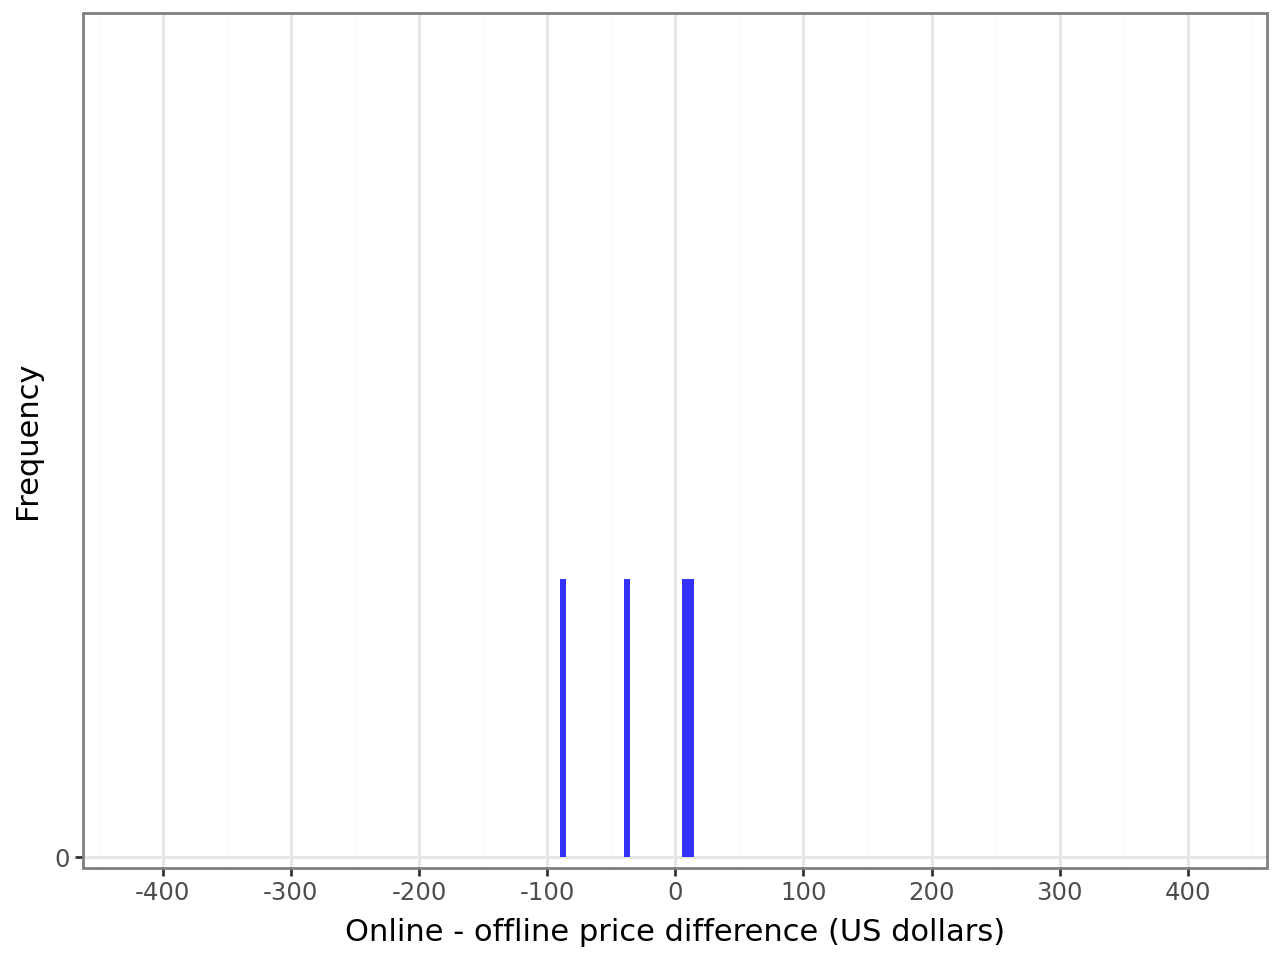

In [62]:
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=5,
        boundary=0,
        fill="blue",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
        closed="left",
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + scale_x_continuous(limits=(-420, 420), breaks=np.arange(-400, 420,100))
    + scale_y_continuous(
        limits=(0, 3), breaks=np.arange(0, 3, 100), expand=(0.01, 0.01)
    )
    + geom_segment(aes(x=300, y=500, xend=415, yend=20), arrow=arrow())
    + annotate("text", x=300, y=700, label="max value= 415", size=11.5)
    + geom_segment(aes(x=-280, y=500, xend=-380, yend=20), arrow=arrow())
    + annotate("text", x=-300, y=700, label="min value= -380", size=11.5)
)


In [64]:
# 4.99999 not 5 -- needed because of data imported from stata may be stored wierdly.
data1 = data.loc[abs(data["diff"]) < 4.999999]
data1["diff"].describe()


count    118.000000
mean      -0.030169
std        0.304830
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.900000
Name: diff, dtype: float64

In [65]:
data1

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
8243,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,1056,11.95,11.95,...,20:26,04363000,20160228_202650.jpg,1056,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8244,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,13460,23.42,23.42,...,20:43,04363000,20160228_204340.jpg,13460,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8245,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,19892,13.90,13.90,...,20:36,04363000,20160228_203625.jpg,19892,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8246,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,23556,10.34,10.34,...,21:14,04363000,20160228_211500.jpg,23556,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8247,BRAZIL,10,BRAZIL_10,2016-02-28,28.0,2.0,2016.0,2765,57.89,57.89,...,21:06,04363000,20160228_210658.jpg,2765,NaN,Regular Price,768619.0,NaN,Brazil,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,85539,38.19,38.19,...,15:34,04363000,20160313_153443.jpg,85539,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8391,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,9185,49.99,49.89,...,16:15,04363000,20160313_161533.jpg,9185,NaN,Regular Price,768619.0,NaN,Brazil,-0.10
8392,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,932,12.59,12.59,...,16:00,04363000,20160313_160027.jpg,932,NaN,Regular Price,768619.0,NaN,Brazil,0.00
8393,BRAZIL,10,BRAZIL_10,2016-03-13,13.0,3.0,2016.0,982,24.99,24.95,...,16:14,04363000,20160313_161457.jpg,982,NaN,Regular Price,768619.0,NaN,Brazil,-0.04


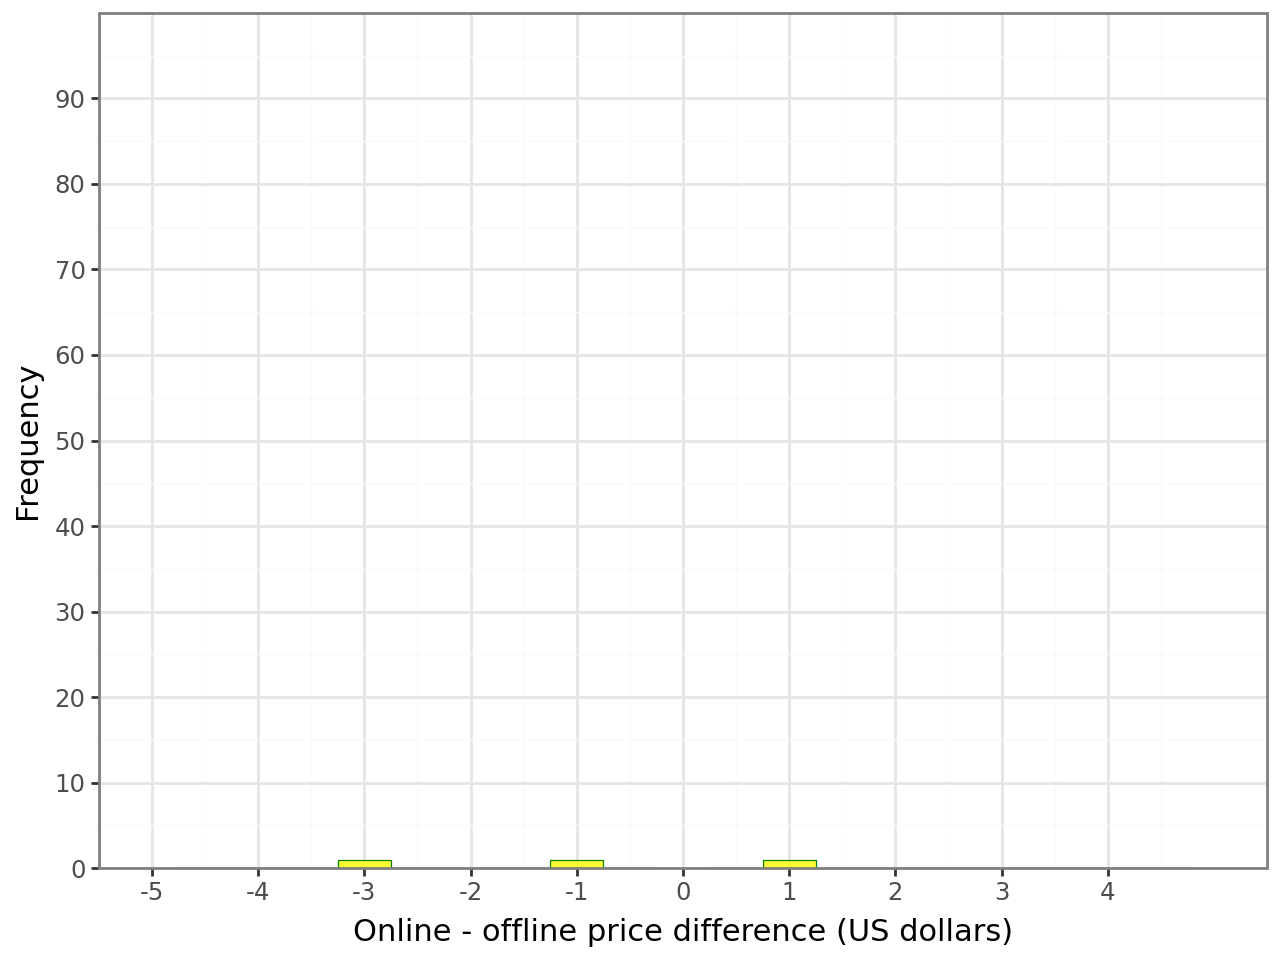

In [67]:
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=0.5,
        center=0.5,
        color="green",
        fill="yellow",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(limits=(-5, 5), breaks=np.arange(-5, 5, 1))
    + scale_y_continuous(expand=(0.00, 0.00),limits=(0, 100), breaks=np.arange(0, 100, 10))
)


## t statistics

In [14]:
# calc mean
mean=-round(data["diff"].mean(),3)
mean

np.float64(-0.054)

In [15]:
#calc SE
#SE = (1 / sqrt (n)) * std
std = round(data["diff"].std(), 3)
n = data["diff"].count()
SE = round((1 / np.sqrt(n)) * std,3)
SE

np.float64(0.125)

In [16]:
#calc t test
t = -mean/SE
t
# here we dont reject the null hyp of 0 diff

np.float64(0.432)

In [17]:
from scipy import stats

# Calculate the p-value for the mean difference using a one-sample t-test
p_value = stats.ttest_1samp(data["diff"], 0).pvalue
p_value

np.float64(0.6619460766193054)

## Conf Interval

In [18]:
ci_lower_se = mean - 2 * SE
ci_upper_se = mean + 2 * SE

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [-0.3040, 0.1960]


In [19]:
t_stat = data[]

SyntaxError: invalid syntax (2247945585.py, line 1)

In [ ]:
# HYPOTHESIS
from scipy import stats

stats.ttest_1samp(data["diff"], 0)


TtestResult(statistic=np.float64(0.4372481266029261), pvalue=np.float64(0.6619460766193054), df=np.int64(6438))

In [ ]:
def t_test_1samp(series, mu=0):
    """
    This is a function to calculate t_test for 1 sample.
    Return: tuple of 2 elements, first is sample mean, second is t test object from scipy
    """
    return (np.mean(series), stats.ttest_1samp(series, mu))


In [ ]:
# MULTIPLE HYPOTHESES
spd = [data.loc[data["retailer"] == x] for x in set(data["retailer"])]
out = [(set(x["retailer"]), t_test_1samp(x["diff"], 0)) for x in spd]

In [ ]:
out


[({44},
  (np.float64(3.73675),
   TtestResult(statistic=np.float64(2.0970967695735117), pvalue=np.float64(0.038102345149389), df=np.int64(119)))),
 ({45},
  (np.float64(-1.2166300366300367),
   TtestResult(statistic=np.float64(-1.2271928388565805), pvalue=np.float64(0.22027995382690432), df=np.int64(545)))),
 ({46},
  (np.float64(-0.4290707648320227),
   TtestResult(statistic=np.float64(-11.641716539786147), pvalue=np.float64(5.8008651517374406e-30), df=np.int64(1398)))),
 ({47},
  (np.float64(0.051625239005736144),
   TtestResult(statistic=np.float64(1.6613855468290473), pvalue=np.float64(0.09723645884012402), df=np.int64(522)))),
 ({48},
  (np.float64(0.42059701492537316),
   TtestResult(statistic=np.float64(2.132197897818741), pvalue=np.float64(0.03390329067089751), df=np.int64(267)))),
 ({49},
  (np.float64(2.410042735042735),
   TtestResult(statistic=np.float64(1.2798236568799926), pvalue=np.float64(0.20187999009028337), df=np.int64(233)))),
 ({50},
  (np.float64(0.60601167315175

In [ ]:
# Create a summary DataFrame from 'out'
import pandas as pd

# Extract relevant info from 'out'
table_out = pd.DataFrame([
	{
		"retailer": list(retailer_set)[0] if len(retailer_set) == 1 else str(retailer_set),
		"estimate": result[0],
		"t_stat": result[1].statistic,
		"p.value": result[1].pvalue
	}
	for retailer_set, result in out
])

# Round the columns as needed
table_out_rounded = table_out.copy()
table_out_rounded["estimate"] = table_out_rounded["estimate"].round(3)
table_out_rounded["p.value"] = table_out_rounded["p.value"].round(4)
table_out_rounded


,retailer,estimate,t_stat,p.value
0,44,3.737,2.097097,0.0381
1,45,-1.217,-1.227193,0.2203
2,46,-0.429,-11.641717,0.0000
3,47,0.052,1.661386,0.0972
4,48,0.421,2.132198,0.0339
5,49,2.410,1.279824,0.2019
6,50,0.606,1.640533,0.1015
7,51,0.284,1.875482,0.0616
8,53,-0.970,-2.730546,0.0073
9,54,-0.028,-0.253362,0.8005


In [ ]:
from scipy.stats import t

# Example: two samples of size 10 → df = 10 + 10 - 2 = 18
df = 18
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit = t.ppf(1 - alpha/2, df)

print(t_crit)


2.10092204024096


# t test another example

## with outlier = 100

In [ ]:
# some groups

a1 = {10, 11, 12, 13, 14, 100}
b1 = {10, 11, 12, 13, 14, 15}

In [ ]:
# finding mean

a1_mean = np.mean(list(a1)) # with outlier
b1_mean = np.mean(list(b1))


a1_list = list(a1) # without outlier
a1_excl_last = a1_list[-5:6]
a1_mean_out = np.mean(a1_excl_last)

a1_mean, b1_mean,a1_mean_out,a1_excl_last

(np.float64(26.666666666666668),
 np.float64(12.5),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab1n = len(a1)
a1n = len(a1_excl_last)

ab1n,a1n

(6, 5)

In [ ]:
# calc SE 

a1_std = np.std(list(a1))
b1_std = np.std(list(b1))
a1_std_out = np.std(a1_excl_last)

#a1_std,b1_std,a1_std_out

# with outlier
SE_out_1 = np.sqrt((a1_std**2)/ab1n + (b1_std**2)/ab1n)

# without outlier
SE_nout_1 = np.sqrt((a1_std_out**2)/a1n + (b1_std**2)/ab1n)

SE_out_1, SE_nout_1

(np.float64(13.417270517812037), np.float64(0.9413347497628626))

In [ ]:
# Calc t
t_out = (a1_mean - b1_mean) / SE_out_1
t_nout = (a1_mean2 - b1_mean) / SE_nout_1
t_out, t_nout

(np.float64(1.055853099768673), np.float64(17.740766506502602))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out = (a1_mean - b1_mean) - t_crit_out * SE_out
ci_upper_out = (a1_mean - b1_mean) + t_crit_out * SE_out

# For a1_excl_last and b1 (without outlier)
ci_lower_nout = (a1_mean2 - b1_mean) - t_crit_nout * SE_nout
ci_upper_nout = (a1_mean2 - b1_mean) + t_crit_nout * SE_nout

print(f"With outlier: [{ci_lower_out:.2f}, {ci_upper_out:.2f}]")
print(f"Without outlier: [{ci_lower_nout:.2f}, {ci_upper_nout:.2f}]")


With outlier: [-25.95, 54.28]
Without outlier: [-33.01, 66.41]


# t test another example

## with outlier = 200

In [ ]:
# some groups

a2 = {10, 11, 4000, 13, 500, 600}
b2 = {0, 1, 2, 3, 4, 1}

In [ ]:
# finding mean

a2_mean = np.mean(list(a2)) # with outlier
b2_mean = np.mean(list(b2))


a2_list = list(a2)
a2_excl_last = a1_list[-5:6] # without outlier
a2_mean2 = np.mean(a2_excl_last)

a2_mean, b2_mean,a2_mean2,a2_excl_last

(np.float64(855.6666666666666),
 np.float64(2.0),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab2n = len(a1)
a2n = len(a1_excl_last)

ab2n,a2n

(6, 5)

In [ ]:
# calc SE 

a2_std = np.std(list(a2))
b2_std = np.std(list(b2))
a2_std_out = np.std(a1_excl_last)

#a2_std,b2_std,a2_std_out

# with outlier
SE_out_2 = np.sqrt((a2_std**2)/ab2n + (b2_std**2)/ab2n)

# without outlier
SE_nout_2 = np.sqrt((a2_std_out**2)/a2n + (b2_std**2)/ab2n)

SE_out_2, SE_nout_2

(np.float64(582.5568482830507), np.float64(0.8563488385776754))

In [ ]:
# Calc t

t_out2 = (a2_mean - b2_mean) / SE_out_2
t_nout2 = (a2_mean2 - b2_mean) / SE_nout_2
t_out2, t_nout2

(np.float64(1.4653791628793795), np.float64(11.677484162422843))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out2 = (a2_mean - b2_mean) - t_crit_out * SE_out_2
ci_upper_out2 = (a2_mean - b2_mean) + t_crit_out * SE_out_2

# For a1_excl_last and b1 (without outlier)
ci_lower_nout2 = (a2_mean2 - b2_mean) - t_crit_nout * SE_nout_2
ci_upper_nout2 = (a2_mean2 - b2_mean) + t_crit_nout * SE_nout_2
_
print(f"With outlier: [{ci_lower_out2:.2f}, {ci_upper_out2:.2f}]")
print(f"Without outlier: [{ci_lower_nout2:.2f}, {ci_upper_nout2:.2f}]")


With outlier: [-415.62, 2122.95]
Without outlier: [8.12, 11.88]


In [ ]:
# Re-import required libraries after code execution state reset
import numpy as np
import scipy.stats as stats
import pandas as pd


# Define the two groups as lists (not sets)
a2 = [10, 11, 4000, 13, 500, 600]
b2 = [0, 1, 2, 3, 4, 1]

# Step 1: Calculate means
a2_mean = np.mean(a2)
b2_mean = np.mean(b2)

# Step 2: Calculate standard deviations
a2_std = np.std(a2, ddof=1)
b2_std = np.std(b2, ddof=1)

# Step 3: Calculate sample sizes
n_a2 = len(a2)
n_b2 = len(b2)

# Step 4: Calculate Standard Error of the difference in means
SE = np.sqrt((a2_std**2 / n_a2) + (b2_std**2 / n_b2))

# Step 5: Calculate t-statistic
t_stat = (a2_mean - b2_mean) / SE

# Step 6: Calculate degrees of freedom using Welch-Satterthwaite approximation
df = ( (a2_std**2 / n_a2) + (b2_std**2 / n_b2) )**2 / \
     ( ((a2_std**2 / n_a2)**2) / (n_a2 - 1) + ((b2_std**2 / n_b2)**2) / (n_b2 - 1) )

# Step 7: Calculate p-value (two-sided test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

# Step 8: Critical t value for 95% confidence
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=df)

# Step 9: Confidence Interval
ci_lower = (a2_mean - b2_mean) - t_crit * SE
ci_upper = (a2_mean - b2_mean) + t_crit * SE



